In [1]:
#!conda activate DS807
import numpy as np
#!pip install pandas
import pandas as pd
#!pip install seaborn
import seaborn as sns
import os
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
#!pip install sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from numpy import asarray
import os
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
#!pip install pillow
#import pillow


# Task 1 - Getting the data in

# ift. opdelingen af test,train og validering har jeg simpelthen bare taget det manuelt fra den store mappe og opdelt det i 20% test og 20% af train til validering
# Dette betyder at vi fra det originale data har:
# test: 520 billeder, 260 af hver
# train: 1664 billeder, 832 af hver
# Validation: 416, 206 af hver

In [2]:
# goes through the folder containing the data and adds them to a list, generates labels and add data to validate labels against

def load_image_function(path):

    images = [] # empty list placeholder
    labels = [] # empty list placeholder
    animal_checker = 'cat' # used to create labels
    container = [] # container to validate correct labels

    for filename in os.listdir(path):

      container.append(filename) # add filename to container

      if animal_checker in filename:
        labels.append('cat') # check if cat is in filename. If so append cat to label
      elif animal_checker not in filename:
        labels.append('dog') # else add dog to label

      animal_photo = load_img(path + f'/{filename}', target_size = (150, 150)) # standardize photo size + loads
      animal_photo = img_to_array(animal_photo) # creates an array

      images.append(animal_photo) # append the photo to the images. The images list contains a list of arrays
    
    return asarray(images), asarray(labels), container; # not interested in list of arrays, but array containing lists. Asarray does this. Returns three arrays

In [3]:
train_data_cats, train_labels_cats, train_container_cats = load_image_function('./Train/cats') # load train data
train_data_cats.shape

train_data_dogs, train_labels_dogs, train_container_dogs = load_image_function('./Train/dogs') # load train data
train_data_dogs.shape

train_data = np.concatenate((train_data_cats,train_data_dogs))
train_labels = np.concatenate((train_labels_cats,train_labels_dogs))
train_container = np.concatenate((train_container_cats,train_container_dogs))
train_data.shape

(1664, 150, 150, 3)

In [4]:
print(f'The training labels is: {train_labels[:5]} and the imported is {train_container[:5]}') # check train data is correct loaded

The training labels is: ['cat' 'cat' 'cat' 'cat' 'cat'] and the imported is ['cat.1500.jpg' 'cat.1501.jpg' 'cat.1502.jpg' 'cat.1503.jpg'
 'cat.1504.jpg']


In [5]:
test_data_cats, test_labels_cats, test_container_cats = load_image_function('./Test/cats') # load train data
test_data_cats.shape

test_data_dogs, test_labels_dogs, test_container_dogs = load_image_function('./Test/dogs') # load train data
test_data_dogs.shape

test_data = np.concatenate((test_data_cats,test_data_dogs))
test_labels = np.concatenate((test_labels_cats,test_labels_dogs))
test_container = np.concatenate((test_container_cats,test_container_dogs))
test_data.shape

print(f'The test labels is: {test_labels[:5]} and the imported is {test_container[:5]}') # check test data is correct loaded

The test labels is: ['cat' 'cat' 'cat' 'cat' 'cat'] and the imported is ['cat.0.jpg' 'cat.1.jpg' 'cat.10.jpg' 'cat.100.jpg' 'cat.101.jpg']


In [6]:
val_data_cats, val_labels_cats, val_container_cats = load_image_function('./Validation/cats') # load train data
val_data_cats.shape

val_data_dogs, val_labels_dogs, val_container_dogs = load_image_function('./Validation/dogs') # load train data
val_data_dogs.shape

val_data = np.concatenate((val_data_cats,val_data_dogs))
val_labels = np.concatenate((val_labels_cats,val_labels_dogs))
val_container = np.concatenate((val_container_cats,val_container_dogs))
val_data.shape

print(f'The val labels is: {val_labels[:5]} and the imported is {val_container[:5]}') # check val data is correct loaded

The val labels is: ['cat' 'cat' 'cat' 'cat' 'cat'] and the imported is ['cat.230.jpg' 'cat.231.jpg' 'cat.232.jpg' 'cat.233.jpg' 'cat.234.jpg']


In [7]:
# checking if reshape is necessary. 

print(f'Train has shape: {train_data.shape} \nTest has shape: {test_data.shape} \nValidation has shape: {val_data.shape}')

# Since they all have (# rows, width, height, # of color channelse) reshaping is not necessary 

Train has shape: (1664, 150, 150, 3) 
Test has shape: (520, 150, 150, 3) 
Validation has shape: (416, 150, 150, 3)


# Task 2 - Create the datagenerators

Due to the high amount of data, you need to write a datagenerator to load the images. This requires you to use the _ImageDataGenerator_ (as shown in Keras Intro - 2) in which you must apply at least one on-the-fly data augmentation. Which type of data augmentation is up to you, but you need to justify your choice in your report. On top of the _ImagaDataGenerator_ you need to apply the _.flow_from_directory_ function to make it work with the directory tree in Task 1

We need to use (at least) one on-the-fly augmentation. Which is better to use? Zooming, flipping, shifting, changing brightness? Should we use more than one? 

ImageDataGenerator: 
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
flow_from_directory: https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow_from_directory

In [8]:
os.getcwd()

'C:\\Users\\jakob\\OneDrive\\Kandidat SDU\\DATASCIENCE\\DS809 Deep learning\\Deep_learning_Data'

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True) 
test_datagen = ImageDataGenerator(rescale=1./255) 

train_generator = train_datagen.flow_from_directory('Train/', target_size=(150, 150), batch_size=32, class_mode='binary') 
validation_generator = test_datagen.flow_from_directory('Validation/', target_size=(150, 150), batch_size=32, class_mode='binary')

augmenter = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10, horizontal_flip=True)


Found 1664 images belonging to 2 classes.
Found 416 images belonging to 2 classes.


In [10]:
cnn_model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=(train_data.shape[1],train_data.shape[2],train_data.shape[3]), activation='relu'),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        tf.keras.layers.SpatialDropout2D(0.2),
        tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
        tf.keras.layers.ReLU(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2, activation='softmax'),
        ], name='classifier')

In [11]:
cnn_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
cnn_model.summary()

Model: "classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
re_lu (ReLU)                 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
spatial_dropout2d (SpatialDr (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
re_lu_1 (ReLU)               (None, 36, 36, 64)        0

In [12]:
history = cnn_model.fit(train_generator, 
                        steps_per_epoch=len(train_data)//32, 
                        epochs=20, 
                        batch_size=32, 
                        validation_data=validation_generator, 
                        validation_steps = 416/32)

Epoch 1/20
52/52 [==============================] - 11s 154ms/step - loss: 0.8110 - accuracy: 0.5204 - val_loss: 0.6909 - val_accuracy: 0.5000
Epoch 2/20
52/52 [==============================] - 8s 150ms/step - loss: 0.6837 - accuracy: 0.5793 - val_loss: 0.6845 - val_accuracy: 0.5505
Epoch 3/20
52/52 [==============================] - 8s 148ms/step - loss: 0.6736 - accuracy: 0.6034 - val_loss: 0.6889 - val_accuracy: 0.5312
Epoch 4/20
52/52 [==============================] - 8s 148ms/step - loss: 0.6684 - accuracy: 0.5944 - val_loss: 0.6456 - val_accuracy: 0.6707
Epoch 5/20
52/52 [==============================] - 8s 151ms/step - loss: 0.6505 - accuracy: 0.6214 - val_loss: 0.6300 - val_accuracy: 0.6538
Epoch 6/20
52/52 [==============================] - 8s 151ms/step - loss: 0.6268 - accuracy: 0.6713 - val_loss: 0.6044 - val_accuracy: 0.6875
Epoch 7/20
52/52 [==============================] - 8s 147ms/step - loss: 0.6016 - accuracy: 0.6737 - val_loss: 0.6005 - val_accuracy: 0.6923
Epoch

# Visualize learning

**Epoch accuracy and loss**

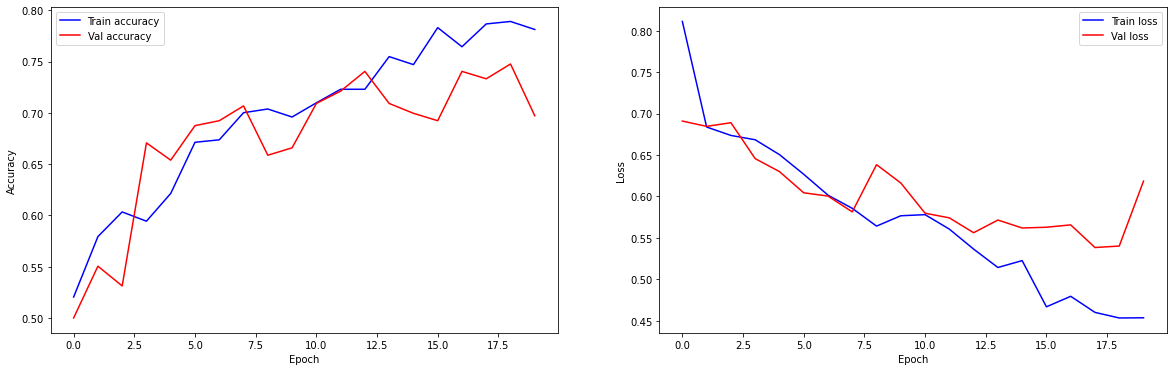

In [13]:
from matplotlib import pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(loss_values) + 1)

#’bo’ is for blue dot, ‘b’ is for solid blue line

plt.rcParams["figure.figsize"] = (20,6)

plt.subplot(1,2,1)

plt.plot(history.history['accuracy'], 'b', label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], 'r',label = 'Val accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)

plt.plot(history.history['loss'], 'b', label = 'Train loss')
plt.plot(history.history['val_loss'], 'r', label = 'Val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

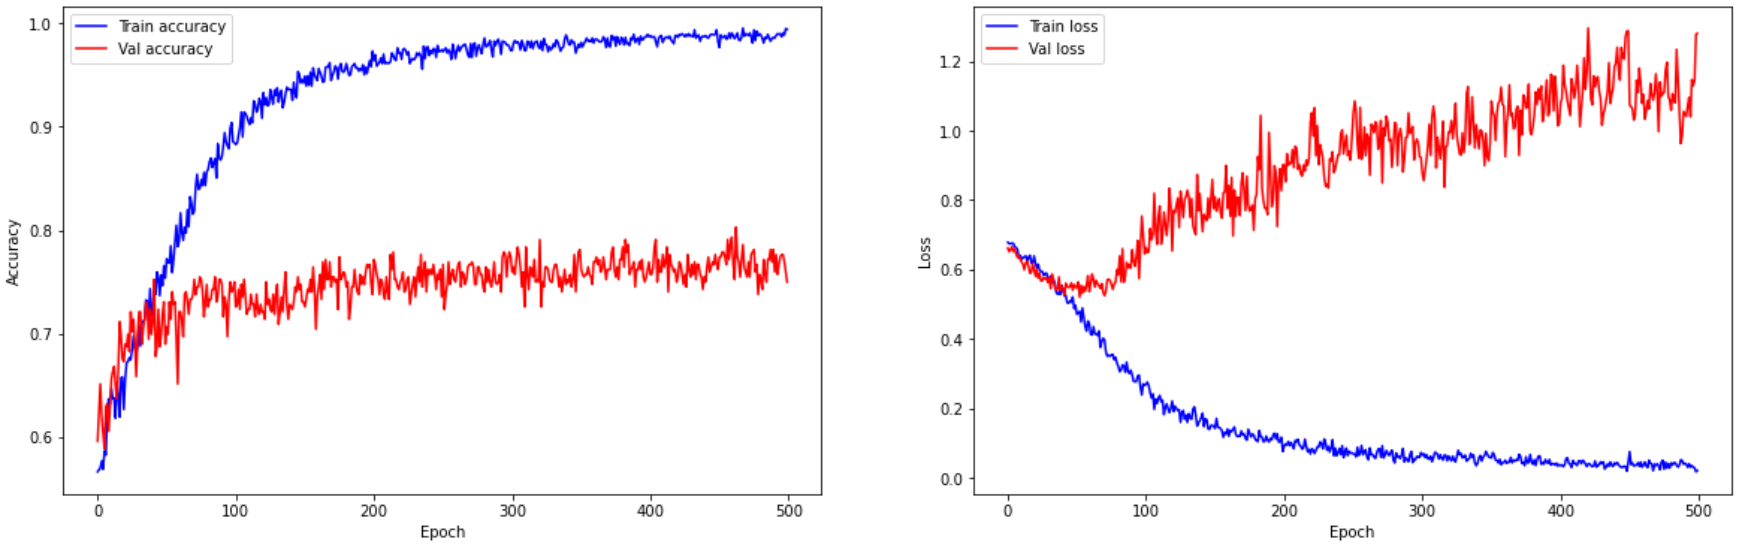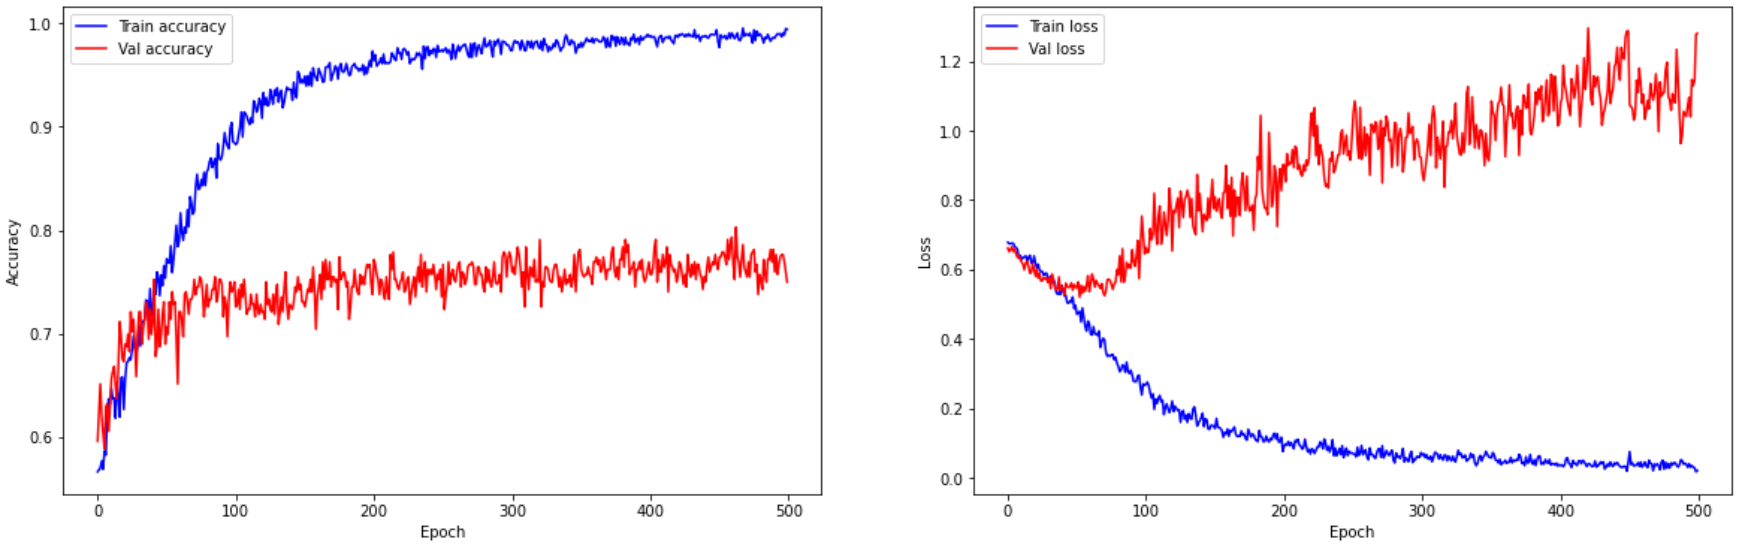**Feature maps, one layer**

In [31]:
#
for i in range(len(cnn_model.layers)):
    layer = cnn_model.layers[i]
    if 'conv' not in layer.name:
        continue    
    print(i , layer.name , layer.output.shape)

0 conv2d (None, 148, 148, 32)
3 conv2d_1 (None, 72, 72, 64)


In [32]:
model_visualize = Model(inputs=cnn_model.inputs , outputs=cnn_model.layers[1].output)

In [38]:
image = train_data[69]

print(image.shape)

(150, 150, 3)


In [39]:
#calculating features_map
features = model_visualize.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,4,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

ValueError: in user code:

    C:\Users\jakob\anaconda3\envs\DS807\lib\site-packages\tensorflow\python\keras\engine\training.py:1569 predict_function  *
        return step_function(self, iterator)
    C:\Users\jakob\anaconda3\envs\DS807\lib\site-packages\tensorflow\python\keras\engine\training.py:1559 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\jakob\anaconda3\envs\DS807\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1285 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\jakob\anaconda3\envs\DS807\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2833 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\jakob\anaconda3\envs\DS807\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3608 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\jakob\anaconda3\envs\DS807\lib\site-packages\tensorflow\python\keras\engine\training.py:1552 run_step  **
        outputs = model.predict_step(data)
    C:\Users\jakob\anaconda3\envs\DS807\lib\site-packages\tensorflow\python\keras\engine\training.py:1525 predict_step
        return self(x, training=False)
    C:\Users\jakob\anaconda3\envs\DS807\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1013 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\jakob\anaconda3\envs\DS807\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:267 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_1: expected shape=(None, 150, 150, 3), found shape=(None, 150, 3)


In [14]:
train_generator.shape

AttributeError: 'DirectoryIterator' object has no attribute 'shape'